In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
#dosyayı oku 
df=pd.read_csv('states_all.csv')

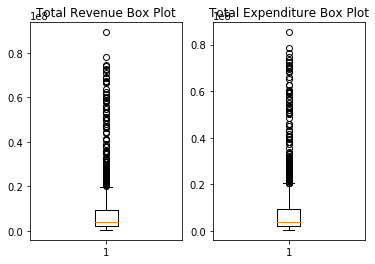

In [3]:
#soru1
#istenen kolonlardaki eksik degerleri interpolate ile doldurup devam ediyoruz. 
#aykırı deger olup olmadıgnı anlamak icin box plot çizdiriyoruz.

df['TOTAL_REVENUE']=df['TOTAL_REVENUE'].interpolate()
df['TOTAL_EXPENDITURE']=df['TOTAL_EXPENDITURE'].interpolate()


plt.subplot(1,2,1)
plt.boxplot(df['TOTAL_REVENUE'])
plt.title('Total Revenue Box Plot')

plt.subplot(1,2,2)
plt.boxplot(df['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure Box Plot')
plt.show()

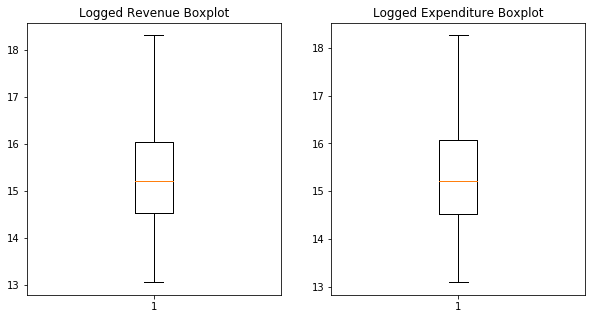

In [4]:
#soru2
#iki kolonunda aykırı deger icerdigi kutu grafiklerinden görülüyor.
#Bu aykırı degerlerden kurtulmak icin log donusumu  yöntemini kullanalım.

log_revenue=np.log(df['TOTAL_REVENUE'])
log_expenditure=np.log(df['TOTAL_EXPENDITURE'])

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(log_revenue)
plt.title('Logged Revenue Boxplot')

plt.subplot(1,2,2)
plt.boxplot(log_expenditure)
plt.title('Logged Expenditure Boxplot')
plt.show()

In [ ]:
#log dönüşümü yöntemi ile aykırı degerlerimizden kurtulmus olduk.

In [10]:
#soru3 
#kolonların aykırı degerlerini temizlemeden yeni degiskeni olusturuyoruz.
#Bütçe açığı oluşturalım ve aykırı değerlerine bakalım.
#log edilmis haliyle  kutu grafiklerini kıyaslayalım
df['BUTCE_ACIGI'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']


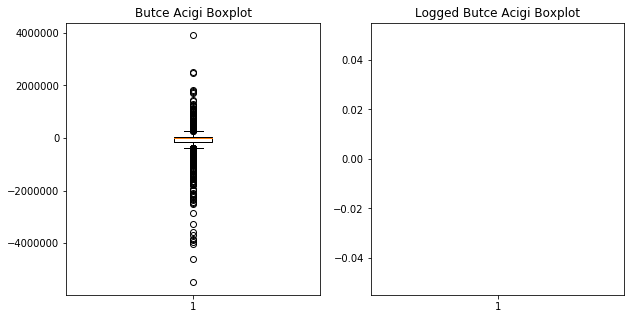

In [15]:
log_butce_acigi=np.log(df['BUTCE_ACIGI'])

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(df['BUTCE_ACIGI'])
plt.title('Butce Acigi Boxplot')

plt.subplot(1,2,2)
plt.boxplot(log_butce_acigi)
plt.title('Logged Butce Acigi Boxplot')
plt.show()
#burada neden log edilmiş butce acigi değişkeninin grafiğini çizdirmediğini anlamadım.
#dropna() kullanarak eksik degerleri yok saymam gerekerek cizmenin bir yol oldugunu öğrenmiştim ancak bu kolonda eksik deger yok zaten.

In [27]:
df['BUTCE_ACIGI'].isna().sum()

0

In [28]:
df['BUTCE_ACIGI'].isnull().sum()

0

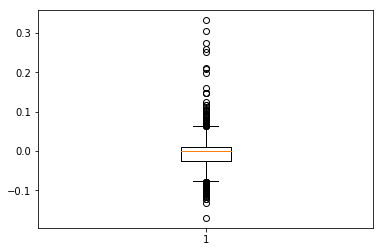

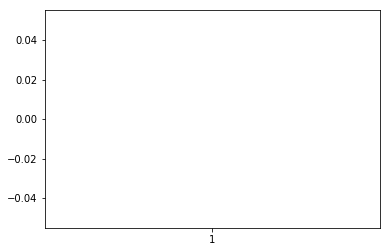

In [26]:
#soru4
#bu sefer iki kolondaki aykırı degerlerden kurtulup yeni degiskeni olusturuyoruz.Bunun adı 'BUTCE_ACIGI_2'
df['BUTCE_ACIGI_2']=np.log(df['TOTAL_REVENUE'])-np.log(df['TOTAL_EXPENDITURE'])
plt.boxplot(df['BUTCE_ACIGI_2'])
plt.show()
#butce acigi degiskenini log donusumu yapılmıs hallerinden olusturunca yine aykırı degerler oldugunu gördük.

#Burada log edimişlerden oluşturduk ve aykırı deger var bu degerlerden kurtulmak için yeniden log edilmesi yanlış mı?
log_butce_acigi_2=np.log(df['BUTCE_ACIGI_2'])
plt.boxplot(log_butce_acigi_2)
plt.show()
#yine grafiği çizmedi neden olabilir?

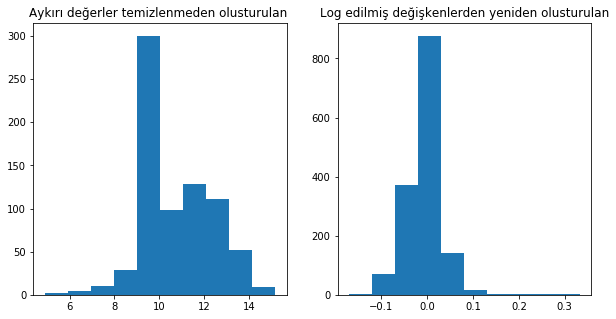

In [24]:
#soru5

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(log_butce_acigi)
plt.title('Aykırı değerler temizlenmeden olusturulan ')

plt.subplot(1,2,2)
plt.hist(df['BUTCE_ACIGI_2'])
plt.title('Log edilmiş değişkenlerden yeniden olusturulan')
plt.show()


In [ ]:
#soru6

grafiklerini görmediğim için kesin yorum yapamıyorum 
ancak çok önemli  bir değişkense mümkün oldukça az kayıpla veriyi elimizde tutmak isterdik bu sebeple
kullanılan aykırı degerden kurtulma yöntemlerinin veri kaybetmeyen bir yol olması gerek diye düşünüyorum.
Yine grafiği görmeden yorumlarsak bence ilk halindeki kolonlardan oluşturulan değişkenin orjinale yakınlığı daha fazla olacağından sonradan 
aykırı degerlerden kurtulmak daha mantıklı olabilir diye düşünüyorum.

Eksiklerim ve sorularım:
1)neden log edilmiş hallerini çizdiremedim?
2)log dönüşümü yapılarak elde edilen yeni değişkende  hala aykırı değer var ise bunu ikinci kez log etmek hata mı?
Bu durumda hata ise başka bir aykırı degerden kurtulma yolu mu denenmeli?